### 농구 선수의 게임 데이터를 활용한, 포지션 예측을 위한 데이터 정제

#### 문제 정의
NBA 선수들의 게임 기록을 데이터로 사용해서 특정 선수의 포지션을 예측하자

In [46]:
import pandas as pd

In [47]:
nba = pd.read_csv('../data/basketball.csv')
nba.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Player : 선수 이름
- Pos : 포지션
- 3P : 한 경기당 평균 3점슛 성공횟수
- 2P : 한 경기당 평균 2점슛 성공횟수
- TRB : 한 경기당 평균 리바운드 성공횟수
- AST : 한 경기당 평균 어시스트 성공횟수
- STL : 한 경기당 평균 스틸 성공횟수
- BLK : 한 경기당 평균 블로킹 성공횟수

In [48]:
nba

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [49]:
# 포지션의 종류 파악
nba.Pos.unique()

array(['SG', 'C'], dtype=object)

In [50]:
# 포지션별 갯수 파악
nba.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

### 포지션 별 내용
- C : 골대, 포스트 근처에서 슛을 블로킹하고 리바운드하며 2점슛 득점을 주로 한다.
- SG : 코트 내에서 3점슛 득점을 주로 한다.

### 데이터 시각화
데이터의 특징을 바탕으로 한 공간에서 시각화함으로써,    
머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분

In [51]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 스틸, 2점슛 데이터 시각화

In [52]:
import seaborn as sns

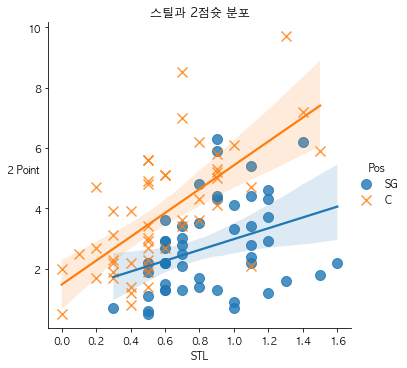

In [53]:
sns.lmplot(
    'STL',
    '2P',
    data=nba,
    markers=['o','x'],
    # fit_reg=False, # 회귀선 여부
    scatter_kws={'s':100}, # 좌표상의 점 크기
    hue='Pos', # 대상값
)

plt.title('스틸과 2점슛 분포')
plt.ylabel('2 Point', rotation=0)

plt.show()

### 어시스트와 2점슛 데이터 시각화

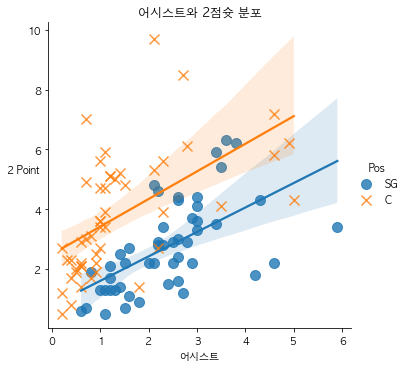

In [54]:
sns.lmplot(
    'AST',
    '2P',
    data=nba,
    markers=['o','x'],
    # fit_reg=False, # 회귀선 여부
    scatter_kws={'s':100}, # 좌표상의 점 크기
    hue='Pos', # 대상값
)

plt.title('어시스트와 2점슛 분포')
plt.xlabel('어시스트', rotation=0)
plt.ylabel('2 Point', rotation=0)

plt.show()

> 스틸과 2점슛 보다 어시스트와 2점슛이 보다 군집이 잘 되어있다.   
> 2점슛, 어시스트, 스틸의 속성으로 데이터를 분포시킬 경우, SG와 C의 경계가 모호하다.

### 블로킹과 3점슛

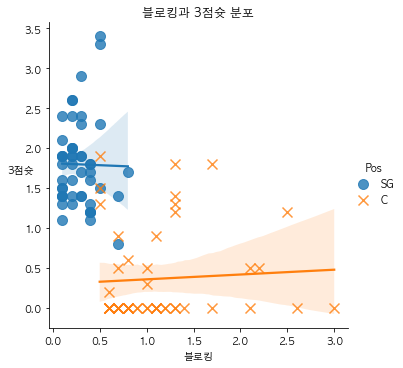

In [55]:
sns.lmplot(
    'BLK',
    '3P',
    data=nba,
    markers=['o','x'],
    # fit_reg=False, # 회귀선 여부
    scatter_kws={'s':100}, # 좌표상의 점 크기
    hue='Pos', # 대상값
)

plt.title('블로킹과 3점슛 분포')
plt.xlabel('블로킹', rotation=0)
plt.ylabel('3점슛', rotation=0)

plt.show()

### 리바운드와 3점슛

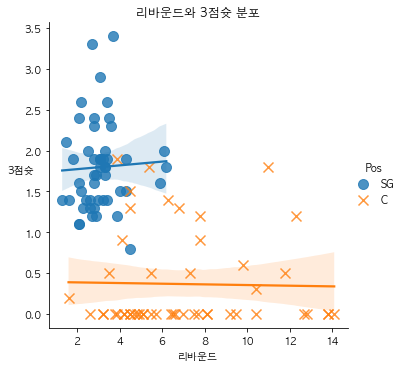

In [56]:
sns.lmplot(
    'TRB',
    '3P',
    data=nba,
    markers=['o','x'],
    # fit_reg=False, # 회귀선 여부
    scatter_kws={'s':100}, # 좌표상의 점 크기
    hue='Pos', # 대상값
)

plt.title('리바운드와 3점슛 분포')
plt.xlabel('리바운드', rotation=0)
plt.ylabel('3점슛', rotation=0)

plt.show()

> fit_reg : 회귀선 여부, seaborn의 장점이기도 하다.   
> 회귀선이 서로 수평일 때 분류하기 좋다.   
> 동일한 분류끼리는 서로 근접해있고, 다른 분류와는 멀리 떨어져있음.(C,SG)   
> 시각화한 결과에서 데이터의 구분이 확실할 경우, 선택된 속성들이 머신러닝 정확도에 큰 도움을 준다.

# 데이터 다듬기
: 분별력이 없는 특징(feature)을 데이터셋에서 제거   
: 시각화를 통해 확인해본 결과 2P, AST, STL은 분별력이 없다.

In [57]:
# 분별력이 없는 특징(feature) 제거하기
nba.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [58]:
nba.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [59]:
# nba.set_index('Player', inplace=True)

In [60]:
nba.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [61]:
data = nba.drop('Pos', axis=1)
label = nba.Pos

### 학습데이터와 검증데이터로 나누기

In [62]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(data, label)

In [63]:
train, test = train_test_split(nba, test_size=0.2) # 20퍼센트를 테스트 데이터로

In [64]:
train.shape

(80, 5)

In [65]:
test.shape

(20, 5)

In [66]:
train.to_csv('../data/basketball_train.csv', index=False)
test.to_csv('../data/basketball_test.csv', index=False) # False, None 둘 다 됨